<a href="https://colab.research.google.com/github/a08037/Portfolio_Dmitry_Frolov/blob/main/M09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset to examine its structure and data
file_path = '/content/drive/MyDrive/Seller_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Seller_ID,Order_Value,Commission_Rate,Promotion_Used,Subscription,Promotion_Income,Subscription_Income
0,1,2248.357077,0.086699,True,False,5000,0
1,2,1930.867849,0.084183,True,True,5000,3000
2,3,2323.844269,0.105457,True,False,5000,0
3,4,2761.514928,0.108259,True,False,5000,0
4,5,1882.923313,0.081263,False,False,0,0


In [ ]:
# 1. Средний чек с каждой продажи (среднее значение 'Order_Value')
average_order_value = data['Order_Value'].mean()

# 2. Средняя комиссия с каждой продажи
data['Commission_Income'] = data['Order_Value'] * data['Commission_Rate']
average_commission_per_sale = data['Commission_Income'].mean()

# 3. Средний доход продавца (учитываем доходы от продвижения и подписки)
data['Seller_Income'] = data['Promotion_Income'] + data['Subscription_Income']
average_seller_income = data['Seller_Income'].mean()

# 4. Процент продавцов, использующих платные инструменты продвижения
promotion_used_percentage = (data['Promotion_Used'].sum() / len(data)) * 100

# 5. Процент продавцов, использующих платную подписку
subscription_used_percentage = (data['Subscription'].sum() / len(data)) * 100

# Подготовим результаты
results = {
    'Средний чек с каждой продажи (руб.)': average_order_value,
    'Средняя комиссия с каждой продажи (руб.)': average_commission_per_sale,
    'Средний доход продавца (руб.)': average_seller_income,
    'Процент продавцов, использующих платные инструменты продвижения (%)': promotion_used_percentage,
    'Процент продавцов, использующих платную подписку (%)': subscription_used_percentage
}

results


{'Средний чек с каждой продажи (руб.)': 2009.6660279111627,
 'Средняя комиссия с каждой продажи (руб.)': 201.39430011707034,
 'Средний доход продавца (руб.)': 3137.0,
 'Процент продавцов, использующих платные инструменты продвижения (%)': 50.8,
 'Процент продавцов, использующих платную подписку (%)': 19.900000000000002}

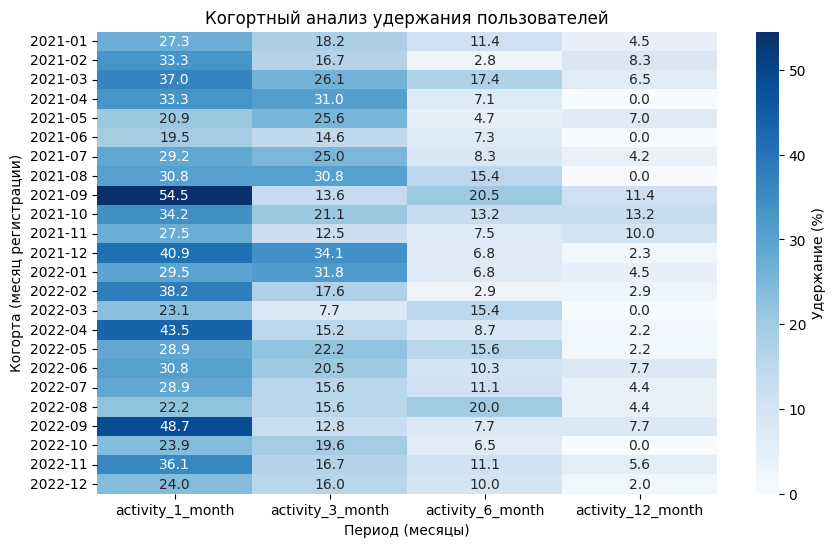

In [ ]:
# Загружаем данные для когортного анализа
cohort_data_path = '/content/drive/MyDrive/Cohort_analysis_data.csv'
cohort_data = pd.read_csv(cohort_data_path)

# Посмотрим на структуру данных, чтобы понять, как их можно обработать для когортного анализа
cohort_data.head()

# Преобразуем столбец с датой регистрации в формат datetime
cohort_data['registration_date'] = pd.to_datetime(cohort_data['registration_date'])

# Добавляем новый столбец, который показывает месяц и год регистрации для создания когорт
cohort_data['cohort_month'] = cohort_data['registration_date'].dt.to_period('M')

# Группируем данные по когорте (месяц регистрации) и считаем процент активных пользователей в каждом периоде
cohort_pivot = cohort_data.groupby('cohort_month').agg({
    'activity_1_month': 'mean',
    'activity_3_month': 'mean',
    'activity_6_month': 'mean',
    'activity_12_month': 'mean'
}) * 100  # Преобразуем в проценты

# Построим тепловую карту для визуализации когортного анализа
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(cohort_pivot, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label': 'Удержание (%)'})
plt.title('Когортный анализ удержания пользователей')
plt.xlabel('Период (месяцы)')
plt.ylabel('Когорта (месяц регистрации)')
plt.show()



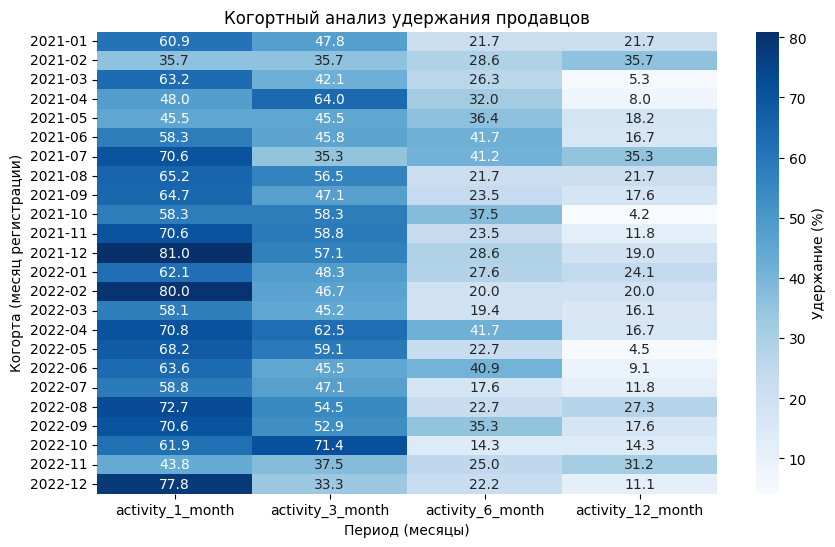

In [ ]:
# Загружаем данные для когортного анализа продавцов
sellers_cohort_data_path = '/content/drive/MyDrive/Sellers_cohort_analysis_data.csv'
sellers_cohort_data = pd.read_csv(sellers_cohort_data_path)

# Посмотрим на структуру данных, чтобы понять, как их можно обработать для когортного анализа
sellers_cohort_data.head()

# Преобразуем столбец с датой регистрации в формат datetime
sellers_cohort_data['registration_date'] = pd.to_datetime(sellers_cohort_data['registration_date'])

# Добавляем новый столбец, который показывает месяц и год регистрации для создания когорт
sellers_cohort_data['cohort_month'] = sellers_cohort_data['registration_date'].dt.to_period('M')

# Группируем данные по когорте (месяц регистрации) и считаем процент активных продавцов в каждом периоде
sellers_cohort_pivot = sellers_cohort_data.groupby('cohort_month').agg({
    'activity_1_month': 'mean',
    'activity_3_month': 'mean',
    'activity_6_month': 'mean',
    'activity_12_month': 'mean'
}) * 100  # Преобразуем в проценты

# Построим тепловую карту для визуализации когортного анализа
plt.figure(figsize=(10, 6))
sns.heatmap(sellers_cohort_pivot, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label': 'Удержание (%)'})
plt.title('Когортный анализ удержания продавцов')
plt.xlabel('Период (месяцы)')
plt.ylabel('Когорта (месяц регистрации)')
plt.show()
